In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#No. of different Cells that we have

data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Label Encoding

In [9]:
data.loc[data['diagnosis'] == 'M', 'diagnosis'] = 0
data.loc[data['diagnosis'] == 'B', 'diagnosis'] = 1

In [10]:
data.diagnosis = data.diagnosis.astype(int)

### Histogram for all the columns

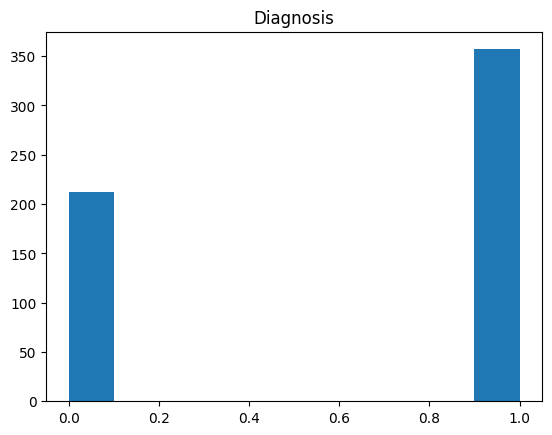

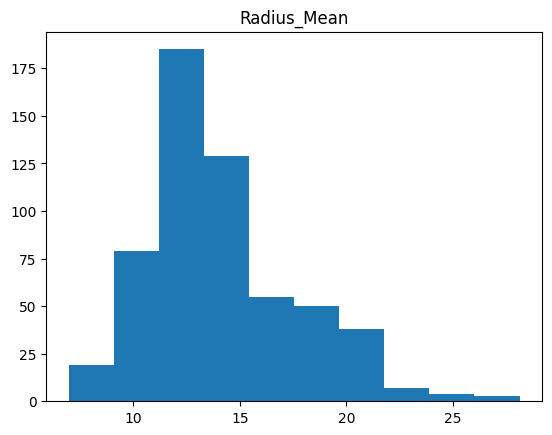

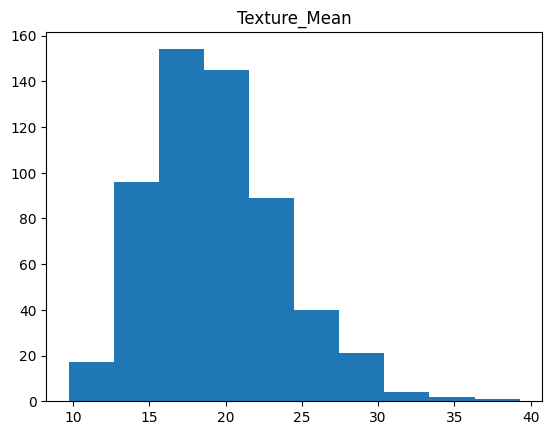

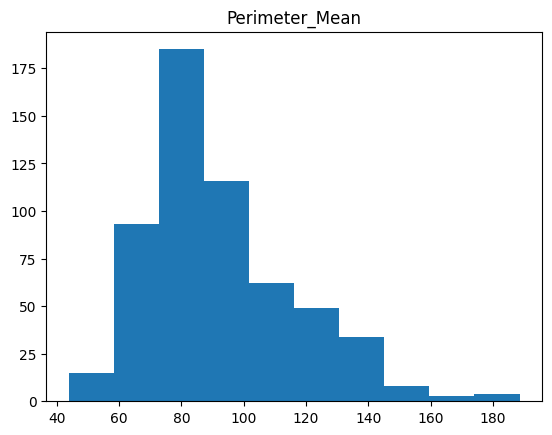

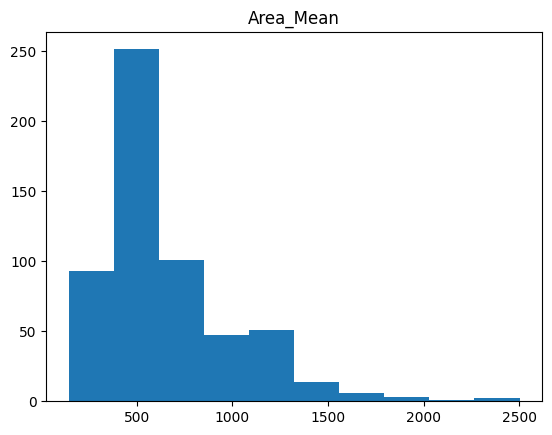

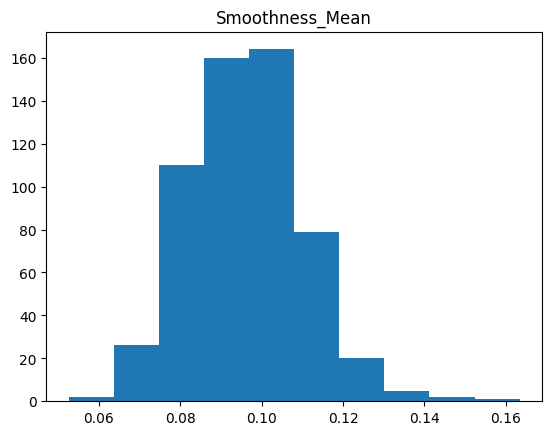

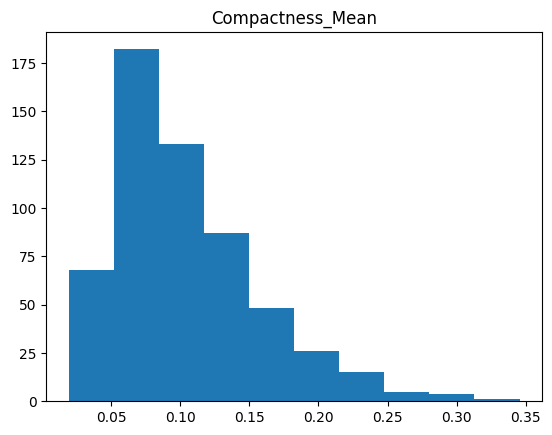

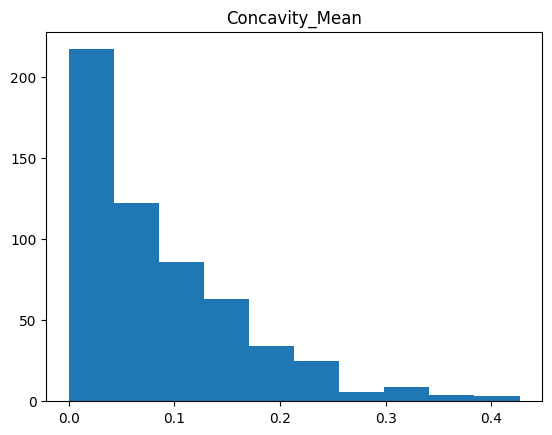

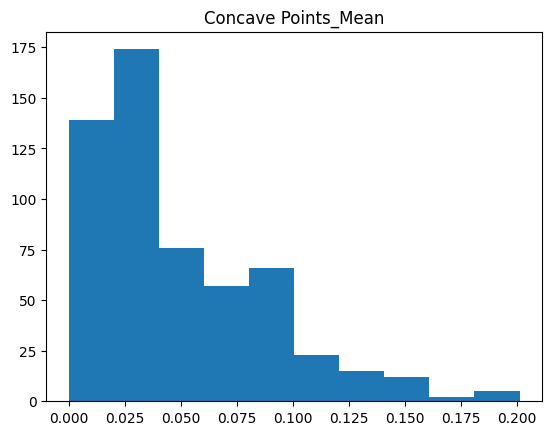

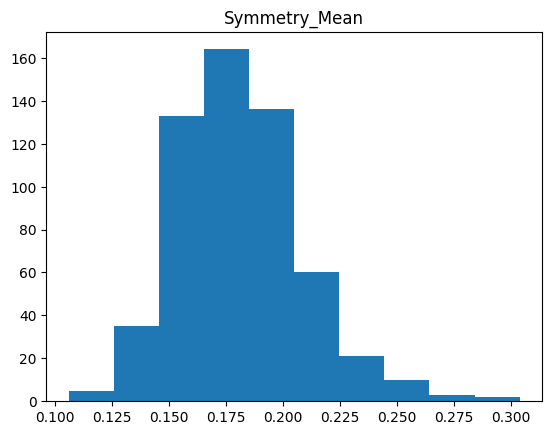

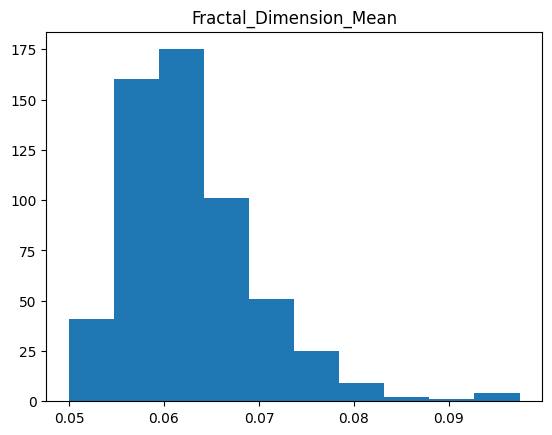

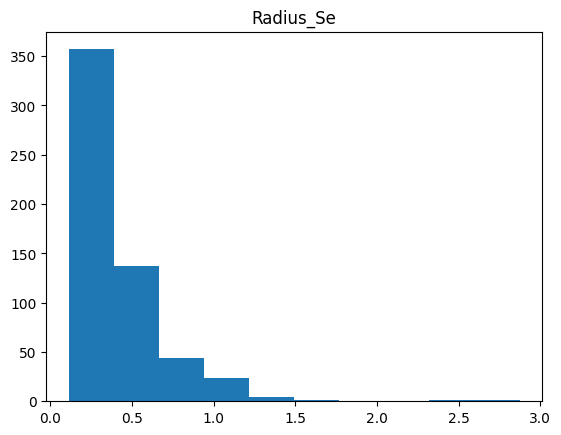

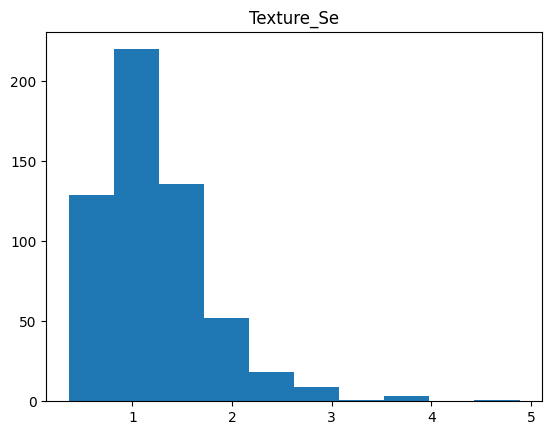

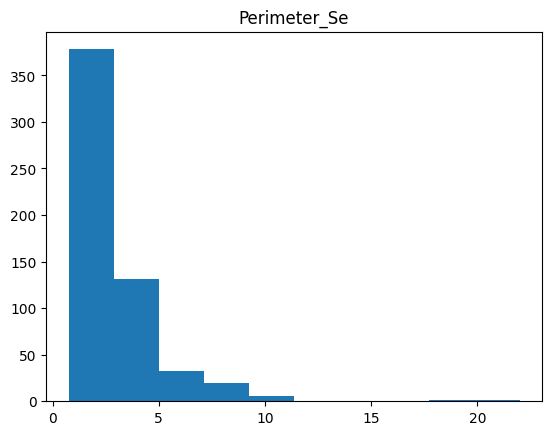

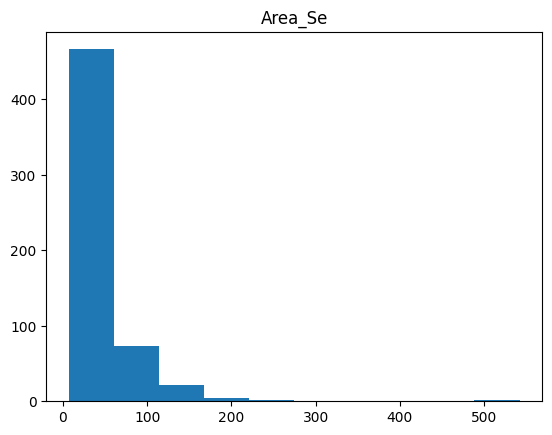

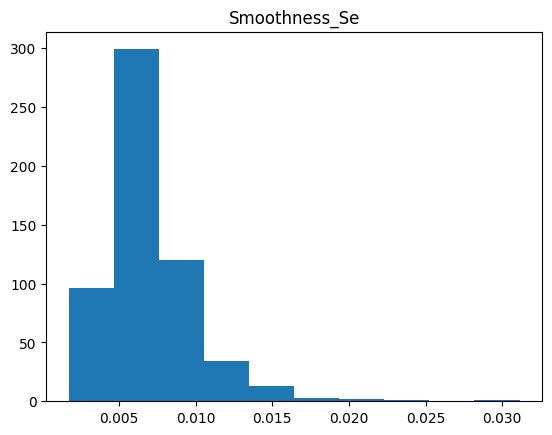

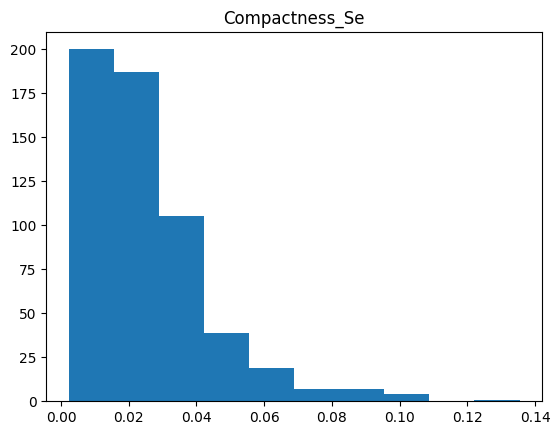

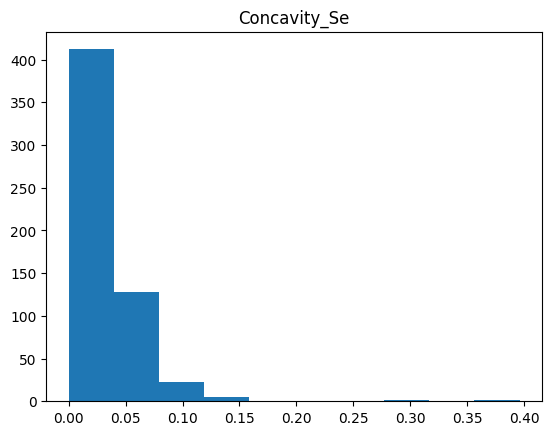

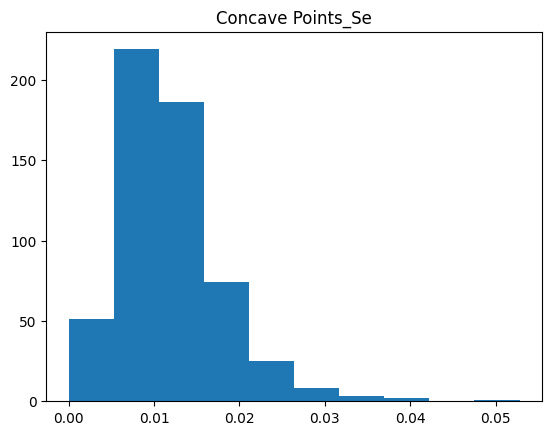

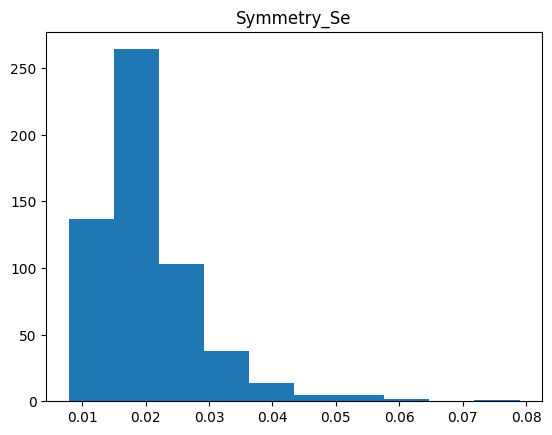

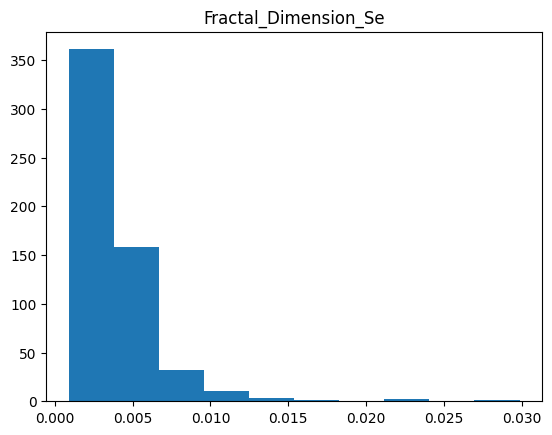

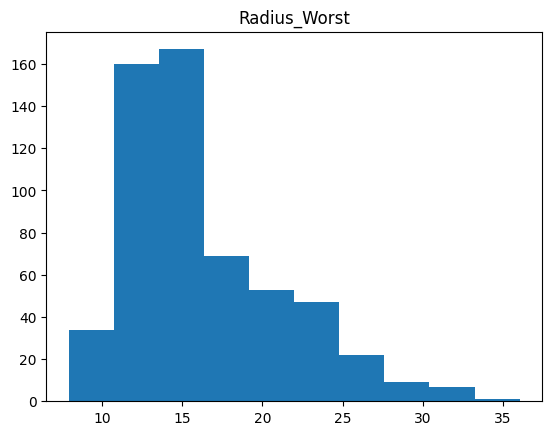

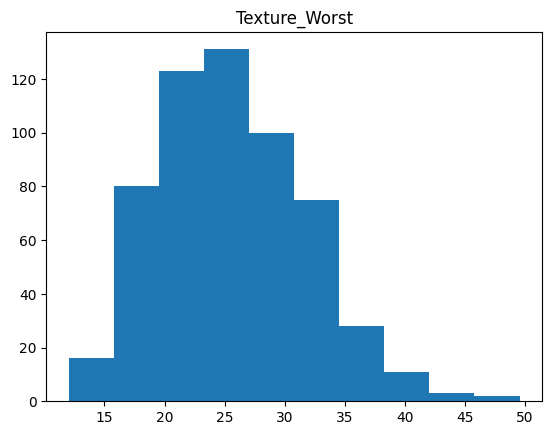

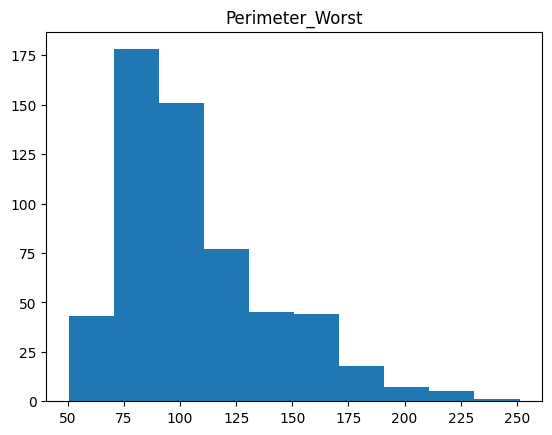

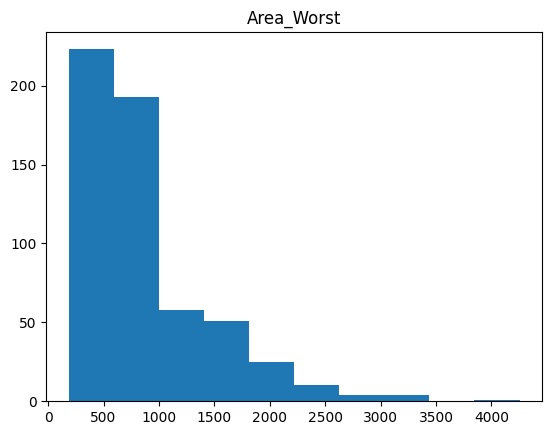

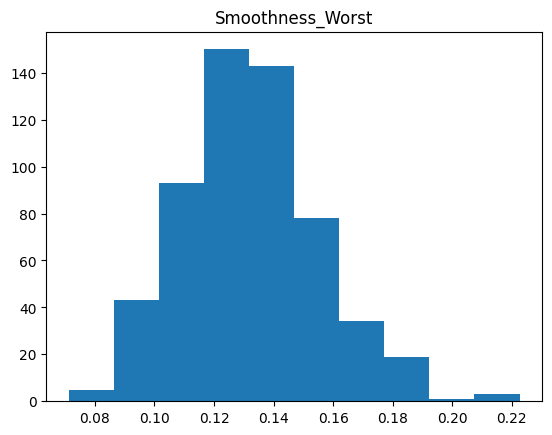

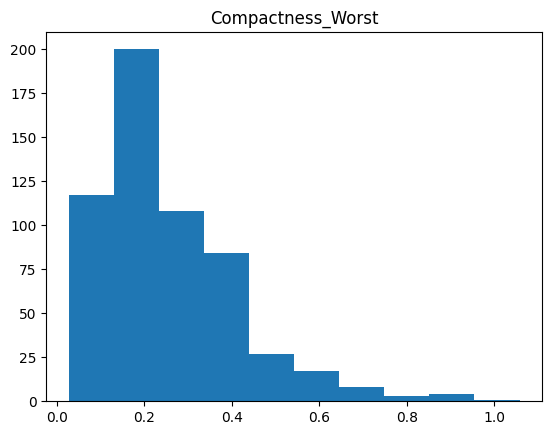

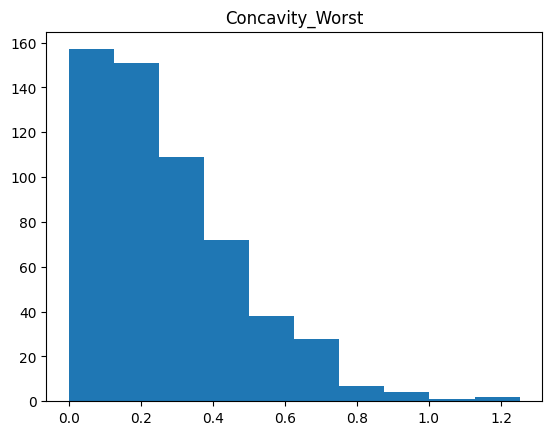

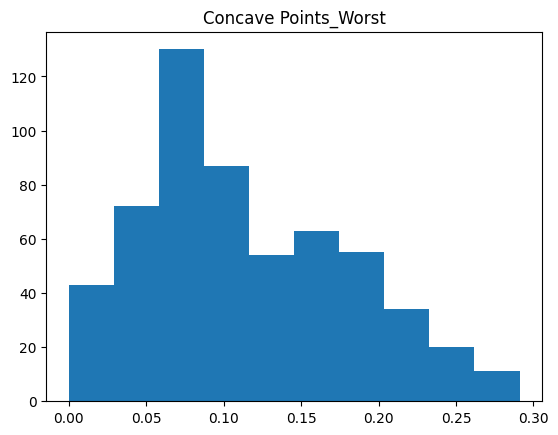

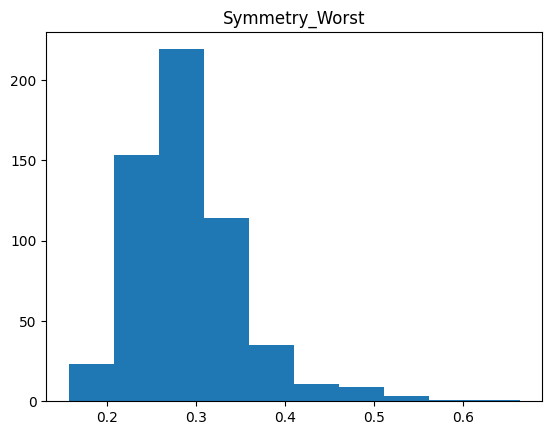

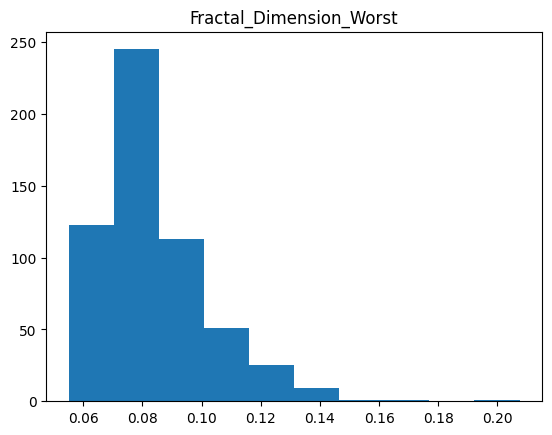

In [11]:
for col in data.columns:
    plt.hist(data[col])
    plt.title(col.title())
    plt.show()

In [22]:
(data.groupby('diagnosis').mean())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


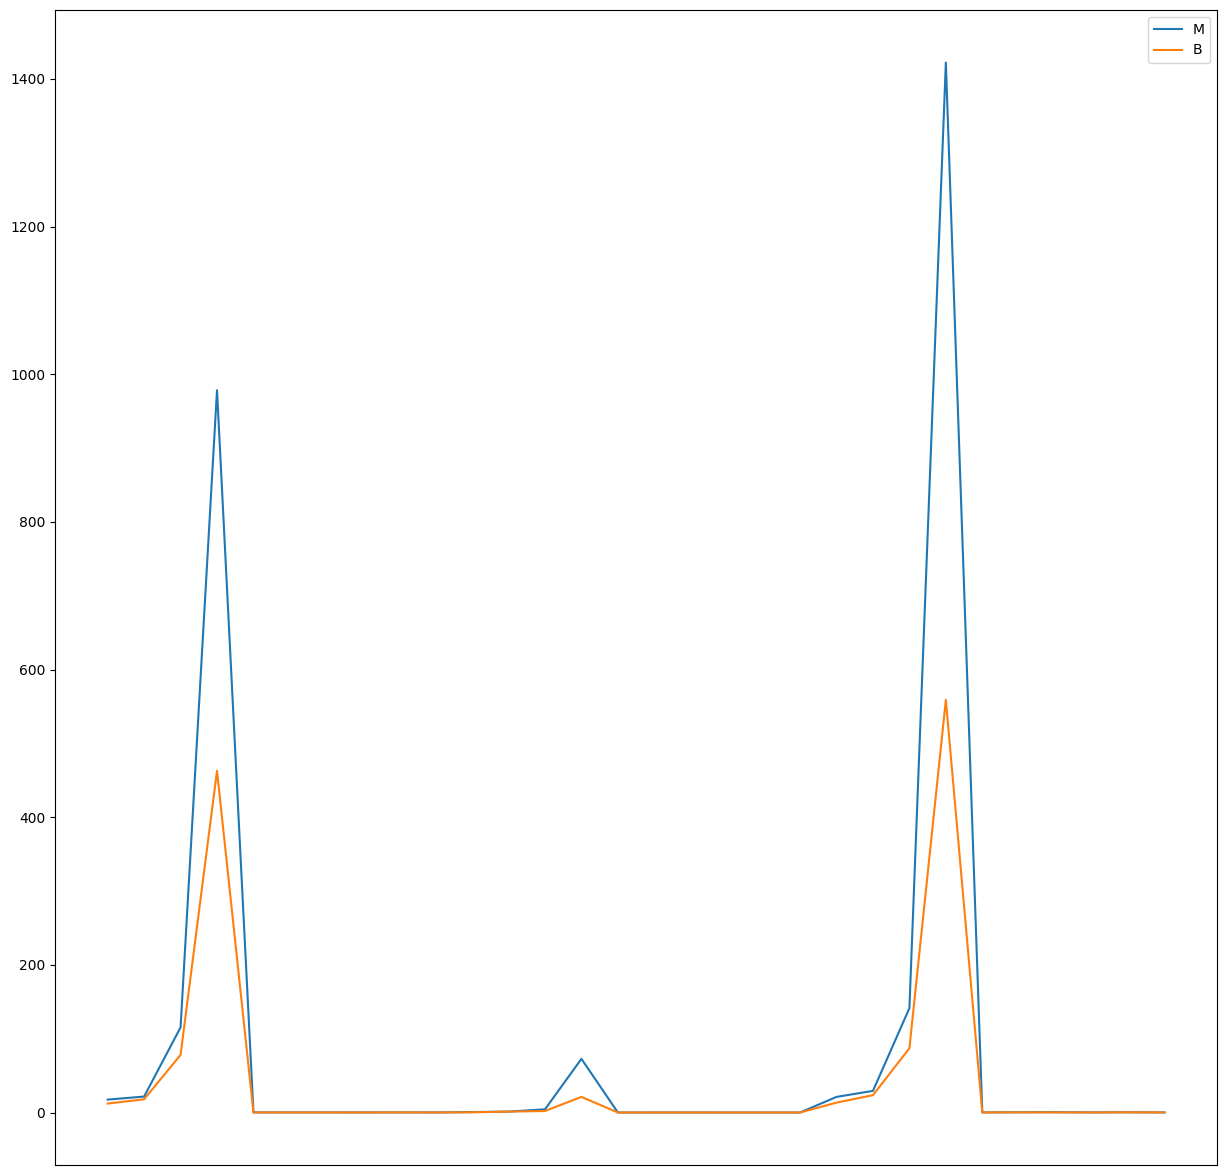

In [33]:
plt.figure(figsize=(15,15))
plt.plot(data.groupby('diagnosis').mean().iloc[0], label='M')
plt.plot(data.groupby('diagnosis').mean().iloc[1], label='B')
plt.legend()
plt.tick_params(labelbottom=False, bottom=False)

### Splitting of the data

In [34]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X, y

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      compactness_mean  concavity_mean  concave po

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Model Training

In [59]:
model = LogisticRegression(C=0.1)

pipe = make_pipeline(StandardScaler(), model)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.1))])

In [60]:
y_ = pipe.predict(X_test)
x_ = pipe.predict(X_train)

print(classification_report(y_test, y_))
print("-"*20)
print(classification_report(y_train, x_))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       170
           1       0.98      1.00      0.99       285

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [61]:
accuracy_score(y_test, y_)

0.9736842105263158

In [62]:
accuracy_score(y_train, x_)

0.9846153846153847

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

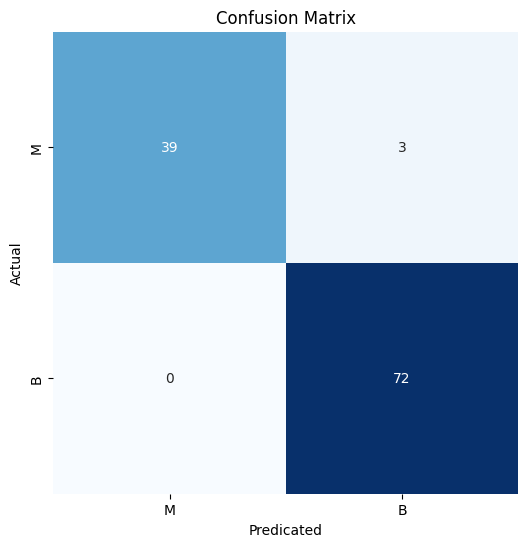

In [63]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_), cmap='Blues', annot=True, cbar=False, xticklabels=['M', 'B'], yticklabels=['M', 'B'])
plt.xlabel('Predicated')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Learning Curve

In [64]:
train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1,1.0,10))

In [65]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

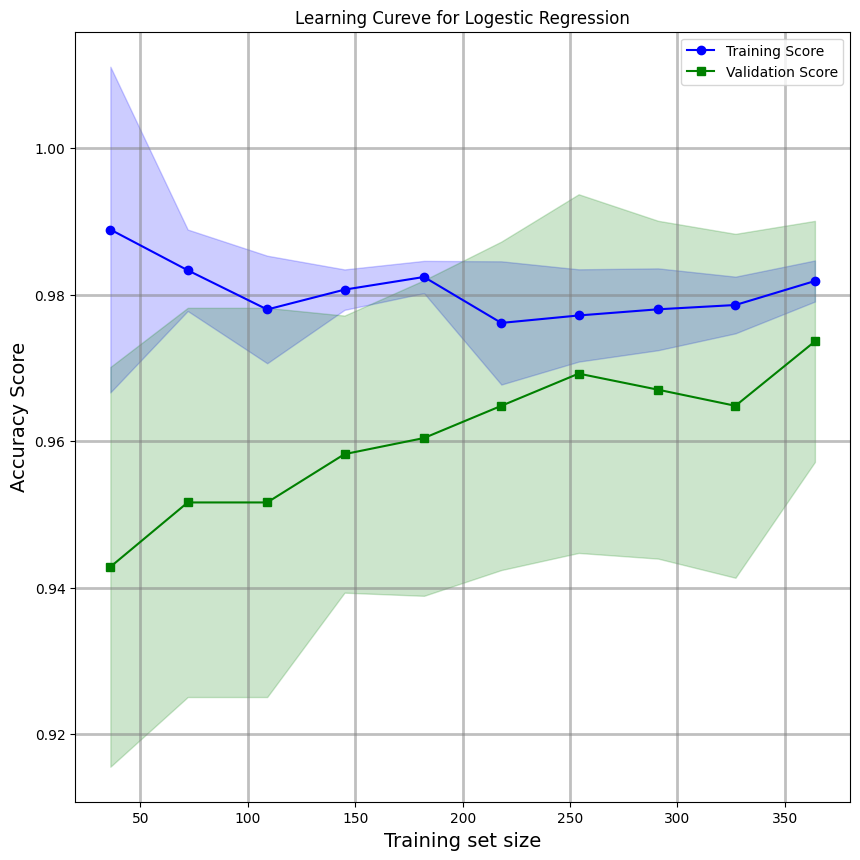

In [66]:
plt.figure(figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, color='blue', marker='o',label="Training Score")
plt.plot(train_sizes, val_scores_mean, color='green', marker='s', label="Validation Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='green', alpha=0.2)

plt.xlabel('Training set size', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Learning Cureve for Logestic Regression')
plt.legend(loc='best')
plt.grid(True, linestyle='-', color='gray', alpha=0.5, linewidth=2)

In [69]:
print(train_scores)
print(val_scores)

[[0.94444444 1.         1.         1.         1.        ]
 [0.97222222 0.98611111 0.98611111 0.98611111 0.98611111]
 [0.98165138 0.99082569 0.97247706 0.97247706 0.97247706]
 [0.9862069  0.97931034 0.97931034 0.97931034 0.97931034]
 [0.98351648 0.97802198 0.98351648 0.98351648 0.98351648]
 [0.97247706 0.96788991 0.96788991 0.98623853 0.98623853]
 [0.97637795 0.96850394 0.97244094 0.98425197 0.98425197]
 [0.97938144 0.96907216 0.97594502 0.9862543  0.97938144]
 [0.98165138 0.97553517 0.97553517 0.98470948 0.97553517]
 [0.98626374 0.98076923 0.98076923 0.98351648 0.97802198]]
[[0.95604396 0.95604396 0.96703297 0.89010989 0.94505495]
 [0.95604396 0.96703297 0.97802198 0.9010989  0.95604396]
 [0.95604396 0.96703297 0.97802198 0.9010989  0.95604396]
 [0.95604396 0.96703297 0.97802198 0.92307692 0.96703297]
 [0.95604396 0.96703297 0.98901099 0.92307692 0.96703297]
 [0.96703297 0.97802198 0.98901099 0.92307692 0.96703297]
 [0.98901099 0.97802198 0.98901099 0.92307692 0.96703297]
 [0.97802198 

In [70]:
import pickle
with open('model.dat', 'wb') as file:
    pickle.dump(pipe, file)